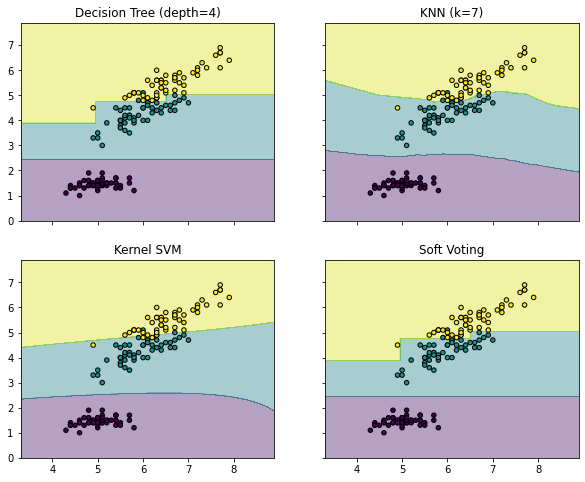

In [1]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

iris = datasets.load_iris()
X = iris.data[:,[0,2]] #取两列，方便绘图
y = iris.target

clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt',clf1),('knn',clf2),('svc',clf3)], voting='soft', weights=[2,1,1])
#weights控制每个算法的权重, voting=’soft' 使用了软权重


clf1.fit(X,y)
clf2.fit(X,y)
clf3.fit(X,y)
eclf.fit(X,y)

x_min, x_max = X[:,0].min() -1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() -1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))  #创建网格

fig, axes = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8)) #共享X轴和Y轴

for idx, clf, title in zip(product([0, 1],[0, 1]),
                           [clf1, clf2, clf3, eclf],
                           ['Decision Tree (depth=4)', 'KNN (k=7)',
                            'Kernel SVM', 'Soft Voting']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #起初我以为是预测的X的值，实际上是预测了上面创建的网格的值，以这些值来进行描绘区域
    Z = Z.reshape(xx.shape)
    axes[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axes[idx[0], idx[1]].scatter(X[:, 0],X[:, 1], c=y, s=20, edgecolor='k')
    axes[idx[0], idx[1]].set_title(title)
plt.show()

In [2]:
import numpy as np
import pandas as pd
import warnings
import json

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, ShuffleSplit

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from xgboost import plot_importance

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

df = pd.read_csv("../Boxcox_data.csv")
data =df.values

Y = df["Outcome"].values
X = df[['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension',
       'SBP', 'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr',
       'TG', 'TC']].values
names = ['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension',
       'SBP', 'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr',
       'TG', 'TC']


sc = 'f1_macro'

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

clfrf = RandomForestClassifier(n_estimators=35, max_depth= 5, max_features= 4)
#clfSVC =  SVC(C= 20, kernel = 'linear', probability= True)
clfSVC = SVC(C= 1, gamma=1, kernel = 'linear', probability= True)
clfGBDT = GradientBoostingClassifier(n_estimators=45, max_depth= 4, max_features= 3)
#clfXGBT = XGBClassifier(n_estimators=35, max_depth= 5, learning_rate= 0.01)
clfXGBT = XGBClassifier(n_estimators=70, max_depth= 6, min_child_weight=1, learning_rate= 0.01)

df_weights = pd.read_csv("../Weight_new.csv")

print(df_weights[df_weights.columns[0]])
df_weights = df_weights.drop([df_weights.columns[0],df_weights.columns[-1]], axis= 1)



0      RF
1     SVM
2    GBDT
3     XGB
Name: blank, dtype: object


In [5]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score, ShuffleSplit

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
max_score = 0
max_weights = []
for index, col in tqdm(df_weights.iteritems()):
    #print(col)
    clf_weights = col.values[:4]*10
    print(clf_weights)
    vclf = VotingClassifier(estimators=[('rf',clfrf),('svc',clfSVC),('gbdt',clfGBDT),('xgbt',clfXGBT)], voting='soft', weights= clf_weights)
    score = cross_val_score(vclf, X, Y, cv=ShuffleSplit(10, test_size = .2, train_size = .8), n_jobs = 8, scoring= sc)
    print(score)
    print(sum(score)/len(score))

    if max_score<(sum(score)/len(score)):
        max_weights = clf_weights
        max_score = sum(score)/len(score)

print(max_score, max_weights)    

0it [00:00, ?it/s]

[1. 1. 3. 5.]


1it [00:06,  6.13s/it]

[0.88405797 0.85507246 0.82608696 0.84057971 0.89855072 0.85507246
 0.89855072 0.88405797 0.82608696 0.88405797]
0.8652173913043478
[1. 1. 4. 4.]


2it [00:11,  5.85s/it]

[0.85507246 0.89855072 0.88405797 0.86956522 0.8115942  0.86956522
 0.88405797 0.85507246 0.84057971 0.8115942 ]
0.8579710144927537
[1. 1. 5. 3.]


3it [00:17,  5.58s/it]

[0.85507246 0.85507246 0.7826087  0.86956522 0.82608696 0.85507246
 0.88405797 0.88405797 0.86956522 0.79710145]
0.8478260869565218
[1. 2. 2. 5.]


4it [00:21,  5.30s/it]

[0.89855072 0.88405797 0.88405797 0.8115942  0.88405797 0.92753623
 0.91304348 0.85507246 0.79710145 0.88405797]
0.8739130434782607
[1. 2. 3. 4.]


5it [00:26,  5.16s/it]

[0.88405797 0.91304348 0.8115942  0.85507246 0.88405797 0.86956522
 0.89855072 0.82608696 0.86956522 0.85507246]
0.8666666666666668
[1. 2. 4. 3.]


6it [00:31,  5.11s/it]

[0.86956522 0.88405797 0.84057971 0.88405797 0.82608696 0.89855072
 0.8115942  0.82608696 0.86956522 0.88405797]
0.8594202898550725
[1. 2. 5. 2.]


7it [00:37,  5.14s/it]

[0.86956522 0.88405797 0.85507246 0.88405797 0.91304348 0.84057971
 0.82608696 0.8115942  0.82608696 0.84057971]
0.855072463768116
[1. 3. 1. 5.]


8it [00:42,  5.16s/it]

[0.82608696 0.88405797 0.82608696 0.89855072 0.86956522 0.94202899
 0.79710145 0.79710145 0.86956522 0.91304348]
0.8623188405797102
[1. 3. 2. 4.]


9it [00:47,  5.13s/it]

[0.82608696 0.88405797 0.89855072 0.91304348 0.85507246 0.92753623
 0.88405797 0.89855072 0.85507246 0.73913043]
0.8681159420289856
[1. 3. 3. 3.]


10it [00:52,  5.13s/it]

[0.8115942  0.85507246 0.88405797 0.86956522 0.89855072 0.86956522
 0.92753623 0.82608696 0.75362319 0.86956522]
0.8565217391304347
[1. 3. 4. 2.]


11it [00:57,  5.10s/it]

[0.91304348 0.82608696 0.91304348 0.82608696 0.86956522 0.84057971
 0.88405797 0.86956522 0.82608696 0.94202899]
0.8710144927536232
[1. 3. 5. 1.]


12it [01:03,  5.25s/it]

[0.84057971 0.8115942  0.86956522 0.82608696 0.89855072 0.85507246
 0.88405797 0.79710145 0.91304348 0.85507246]
0.855072463768116
[1. 4. 1. 4.]


13it [01:08,  5.25s/it]

[0.85507246 0.86956522 0.82608696 0.82608696 0.88405797 0.79710145
 0.91304348 0.84057971 0.84057971 0.86956522]
0.8521739130434783
[1. 4. 2. 3.]


14it [01:13,  5.32s/it]

[0.82608696 0.8115942  0.89855072 0.88405797 0.88405797 0.84057971
 0.84057971 0.79710145 0.85507246 0.85507246]
0.8492753623188406
[1. 4. 3. 2.]


15it [01:18,  5.23s/it]

[0.8115942  0.89855072 0.89855072 0.86956522 0.82608696 0.82608696
 0.91304348 0.8115942  0.85507246 0.82608696]
0.8536231884057971
[1. 4. 4. 1.]


16it [01:23,  5.11s/it]

[0.88405797 0.86956522 0.92753623 0.84057971 0.86956522 0.94202899
 0.86956522 0.85507246 0.8115942  0.88405797]
0.8753623188405797
[1. 5. 1. 3.]


17it [01:28,  5.15s/it]

[0.88405797 0.84057971 0.86956522 0.91304348 0.84057971 0.79710145
 0.8115942  0.88405797 0.86956522 0.89855072]
0.8608695652173914
[1. 5. 2. 2.]


18it [01:33,  5.07s/it]

[0.89855072 0.88405797 0.82608696 0.82608696 0.91304348 0.88405797
 0.92753623 0.76811594 0.88405797 0.85507246]
0.8666666666666666
[1. 5. 3. 1.]


19it [01:38,  5.10s/it]

[0.91304348 0.84057971 0.84057971 0.85507246 0.7826087  0.82608696
 0.85507246 0.91304348 0.8115942  0.86956522]
0.8507246376811594
[2. 1. 2. 5.]


20it [01:43,  5.06s/it]

[0.88405797 0.92753623 0.86956522 0.85507246 0.88405797 0.84057971
 0.88405797 0.82608696 0.82608696 0.89855072]
0.8695652173913044
[2. 1. 3. 4.]


21it [01:49,  5.15s/it]

[0.86956522 0.82608696 0.79710145 0.89855072 0.8115942  0.84057971
 0.85507246 0.84057971 0.86956522 0.85507246]
0.846376811594203
[2. 1. 4. 3.]


22it [01:55,  5.33s/it]

[0.85507246 0.84057971 0.85507246 0.84057971 0.88405797 0.88405797
 0.89855072 0.88405797 0.84057971 0.84057971]
0.8623188405797102
[2. 1. 5. 2.]


23it [02:00,  5.39s/it]

[0.86956522 0.88405797 0.89855072 0.84057971 0.82608696 0.88405797
 0.89855072 0.92753623 0.89855072 0.89855072]
0.882608695652174
[2. 2. 1. 5.]


24it [02:06,  5.47s/it]

[0.86956522 0.89855072 0.88405797 0.8115942  0.91304348 0.94202899
 0.89855072 0.91304348 0.91304348 0.88405797]
0.8927536231884057
[2. 2. 2. 4.]


25it [02:11,  5.51s/it]

[0.85507246 0.8115942  0.84057971 0.84057971 0.86956522 0.91304348
 0.82608696 0.86956522 0.79710145 0.85507246]
0.8478260869565217
[2. 2. 3. 3.]


26it [02:16,  5.33s/it]

[0.84057971 0.86956522 0.89855072 0.84057971 0.85507246 0.82608696
 0.85507246 0.89855072 0.85507246 0.91304348]
0.865217391304348
[2. 2. 4. 2.]


27it [02:21,  5.19s/it]

[0.85507246 0.84057971 0.86956522 0.89855072 0.86956522 0.89855072
 0.85507246 0.85507246 0.86956522 0.92753623]
0.8739130434782609
[2. 2. 5. 1.]


28it [02:26,  5.18s/it]

[0.92753623 0.85507246 0.88405797 0.84057971 0.91304348 0.88405797
 0.82608696 0.85507246 0.82608696 0.76811594]
0.8579710144927537
[2. 3. 1. 4.]


29it [02:31,  5.04s/it]

[0.79710145 0.84057971 0.8115942  0.82608696 0.88405797 0.91304348
 0.88405797 0.91304348 0.84057971 0.89855072]
0.8608695652173914
[2. 3. 2. 3.]


30it [02:36,  5.12s/it]

[0.86956522 0.84057971 0.85507246 0.8115942  0.8115942  0.92753623
 0.82608696 0.91304348 0.88405797 0.79710145]
0.8536231884057971
[2. 3. 3. 2.]


31it [02:42,  5.20s/it]

[0.76811594 0.82608696 0.88405797 0.84057971 0.84057971 0.7826087
 0.88405797 0.82608696 0.86956522 0.91304348]
0.8434782608695652
[2. 3. 4. 1.]


32it [02:47,  5.31s/it]

[0.88405797 0.84057971 0.85507246 0.86956522 0.88405797 0.88405797
 0.82608696 0.85507246 0.82608696 0.84057971]
0.8565217391304347
[2. 4. 1. 3.]


33it [02:53,  5.37s/it]

[0.88405797 0.88405797 0.85507246 0.86956522 0.91304348 0.86956522
 0.91304348 0.92753623 0.84057971 0.82608696]
0.8782608695652174
[2. 4. 2. 2.]


34it [02:58,  5.36s/it]

[0.88405797 0.88405797 0.8115942  0.82608696 0.88405797 0.84057971
 0.88405797 0.85507246 0.84057971 0.85507246]
0.856521739130435
[2. 4. 3. 1.]


35it [03:03,  5.38s/it]

[0.85507246 0.88405797 0.84057971 0.8115942  0.84057971 0.89855072
 0.84057971 0.7826087  0.73913043 0.84057971]
0.8333333333333333
[2. 5. 1. 2.]


36it [03:09,  5.29s/it]

[0.84057971 0.85507246 0.86956522 0.8115942  0.86956522 0.76811594
 0.82608696 0.88405797 0.82608696 0.85507246]
0.8405797101449275
[2. 5. 2. 1.]


37it [03:14,  5.32s/it]

[0.84057971 0.85507246 0.85507246 0.85507246 0.88405797 0.86956522
 0.86956522 0.84057971 0.86956522 0.97101449]
0.8710144927536234
[3. 1. 1. 5.]


38it [03:19,  5.21s/it]

[0.88405797 0.8115942  0.85507246 0.86956522 0.89855072 0.89855072
 0.91304348 0.91304348 0.89855072 0.85507246]
0.8797101449275362
[3. 1. 2. 4.]


39it [03:25,  5.36s/it]

[0.82608696 0.89855072 0.89855072 0.88405797 0.89855072 0.91304348
 0.95652174 0.89855072 0.85507246 0.86956522]
0.8898550724637679
[3. 1. 3. 3.]


40it [03:30,  5.23s/it]

[0.85507246 0.89855072 0.86956522 0.8115942  0.84057971 0.84057971
 0.82608696 0.86956522 0.92753623 0.82608696]
0.8565217391304347
[3. 1. 4. 2.]


41it [03:35,  5.21s/it]

[0.86956522 0.85507246 0.94202899 0.84057971 0.86956522 0.88405797
 0.85507246 0.82608696 0.82608696 0.8115942 ]
0.8579710144927539
[3. 1. 5. 1.]


42it [03:40,  5.17s/it]

[0.94202899 0.91304348 0.8115942  0.86956522 0.86956522 0.94202899
 0.85507246 0.82608696 0.79710145 0.84057971]
0.8666666666666666
[3. 2. 1. 4.]


43it [03:45,  5.27s/it]

[0.8115942  0.79710145 0.8115942  0.91304348 0.85507246 0.91304348
 0.86956522 0.91304348 0.88405797 0.86956522]
0.863768115942029
[3. 2. 2. 3.]


44it [03:50,  5.19s/it]

[0.85507246 0.7826087  0.85507246 0.88405797 0.82608696 0.89855072
 0.8115942  0.85507246 0.92753623 0.95652174]
0.8652173913043478
[3. 2. 3. 2.]


45it [03:56,  5.23s/it]

[0.89855072 0.86956522 0.84057971 0.85507246 0.79710145 0.86956522
 0.8115942  0.76811594 0.91304348 0.8115942 ]
0.8434782608695652
[3. 2. 4. 1.]


46it [04:01,  5.22s/it]

[0.82608696 0.84057971 0.86956522 0.79710145 0.88405797 0.86956522
 0.85507246 0.86956522 0.89855072 0.88405797]
0.8594202898550725
[3. 3. 1. 3.]


47it [04:06,  5.30s/it]

[0.8115942  0.85507246 0.88405797 0.79710145 0.92753623 0.84057971
 0.91304348 0.86956522 0.94202899 0.86956522]
0.8710144927536232
[3. 3. 2. 2.]


48it [04:11,  5.17s/it]

[0.8115942  0.89855072 0.88405797 0.89855072 0.88405797 0.94202899
 0.85507246 0.88405797 0.89855072 0.88405797]
0.8840579710144928
[3. 3. 3. 1.]


49it [04:16,  5.18s/it]

[0.86956522 0.88405797 0.88405797 0.89855072 0.88405797 0.86956522
 0.82608696 0.88405797 0.85507246 0.88405797]
0.8739130434782609
[3. 4. 1. 2.]


50it [04:22,  5.23s/it]

[0.88405797 0.84057971 0.86956522 0.86956522 0.82608696 0.88405797
 0.8115942  0.84057971 0.84057971 0.79710145]
0.846376811594203
[3. 4. 2. 1.]


51it [04:27,  5.31s/it]

[0.86956522 0.89855072 0.85507246 0.88405797 0.82608696 0.89855072
 0.84057971 0.88405797 0.94202899 0.88405797]
0.8782608695652174
[3. 5. 1. 1.]


52it [04:32,  5.22s/it]

[0.86956522 0.85507246 0.84057971 0.86956522 0.7826087  0.92753623
 0.89855072 0.84057971 0.86956522 0.82608696]
0.8579710144927535
[4. 1. 1. 4.]


53it [04:38,  5.36s/it]

[0.86956522 0.85507246 0.8115942  0.86956522 0.86956522 0.89855072
 0.85507246 0.84057971 0.76811594 0.7826087 ]
0.8420289855072465
[4. 1. 2. 3.]


54it [04:43,  5.36s/it]

[0.89855072 0.86956522 0.92753623 0.86956522 0.84057971 0.85507246
 0.85507246 0.86956522 0.84057971 0.85507246]
0.8681159420289856
[4. 1. 3. 2.]


55it [04:49,  5.37s/it]

[0.82608696 0.79710145 0.86956522 0.8115942  0.84057971 0.89855072
 0.88405797 0.8115942  0.7826087  0.89855072]
0.8420289855072463
[4. 1. 4. 1.]


56it [04:54,  5.34s/it]

[0.79710145 0.79710145 0.85507246 0.89855072 0.82608696 0.79710145
 0.91304348 0.7826087  0.89855072 0.88405797]
0.844927536231884
[4. 2. 1. 3.]


57it [04:59,  5.22s/it]

[0.89855072 0.84057971 0.91304348 0.88405797 0.85507246 0.88405797
 0.92753623 0.86956522 0.89855072 0.86956522]
0.8840579710144928
[4. 2. 2. 2.]


58it [05:03,  5.04s/it]

[0.92753623 0.88405797 0.89855072 0.82608696 0.89855072 0.88405797
 0.91304348 0.84057971 0.84057971 0.88405797]
0.8797101449275363
[4. 2. 3. 1.]


59it [05:09,  5.12s/it]

[0.82608696 0.85507246 0.85507246 0.88405797 0.85507246 0.86956522
 0.8115942  0.85507246 0.8115942  0.84057971]
0.846376811594203
[4. 3. 1. 2.]


60it [05:14,  5.16s/it]

[0.88405797 0.8115942  0.89855072 0.85507246 0.94202899 0.82608696
 0.89855072 0.91304348 0.85507246 0.89855072]
0.8782608695652174
[4. 3. 2. 1.]


61it [05:20,  5.28s/it]

[0.95652174 0.82608696 0.85507246 0.82608696 0.88405797 0.86956522
 0.95652174 0.89855072 0.84057971 0.84057971]
0.8753623188405799
[4. 4. 1. 1.]


62it [05:25,  5.26s/it]

[0.84057971 0.82608696 0.91304348 0.84057971 0.91304348 0.82608696
 0.88405797 0.89855072 0.84057971 0.92753623]
0.8710144927536232
[5. 1. 1. 3.]


63it [05:30,  5.13s/it]

[0.85507246 0.84057971 0.79710145 0.79710145 0.91304348 0.75362319
 0.76811594 0.84057971 0.92753623 0.89855072]
0.8391304347826086
[5. 1. 2. 2.]


64it [05:34,  5.03s/it]

[0.82608696 0.86956522 0.89855072 0.97101449 0.82608696 0.84057971
 0.86956522 0.88405797 0.84057971 0.85507246]
0.8681159420289856
[5. 1. 3. 1.]


65it [05:40,  5.18s/it]

[0.85507246 0.89855072 0.85507246 0.91304348 0.85507246 0.91304348
 0.89855072 0.89855072 0.94202899 0.92753623]
0.8956521739130435
[5. 2. 1. 2.]


66it [05:45,  5.18s/it]

[0.7826087  0.91304348 0.84057971 0.85507246 0.85507246 0.84057971
 0.84057971 0.82608696 0.8115942  0.91304348]
0.8478260869565218
[5. 2. 2. 1.]


67it [05:50,  5.24s/it]

[0.85507246 0.94202899 0.85507246 0.85507246 0.82608696 0.86956522
 0.76811594 0.84057971 0.85507246 0.84057971]
0.8507246376811596
0.8956521739130435 [5. 1. 3. 1.]


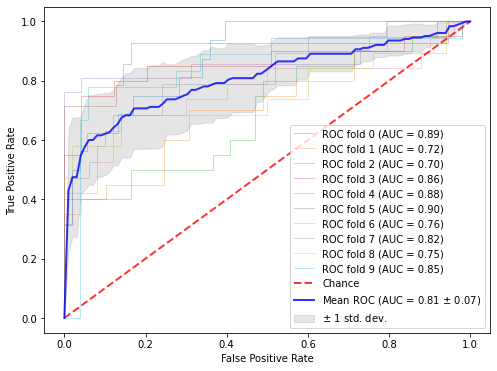

In [6]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .2, train_size = .8)
classifier = VotingClassifier(estimators=[('rf',clfrf),('svc',clfSVC),('gbdt',clfGBDT),('xgbt',clfXGBT)], voting='soft', weights= max_weights)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [7]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score, ShuffleSplit

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
max_score = 0
max_weights = []
for index, col in tqdm(df_weights.iteritems()):
    #print(col)
    clf_weights = col.values[:4]*10
    print(clf_weights)
    vclf = VotingClassifier(estimators=[('rf',clfrf),('svc',clfSVC),('gbdt',clfGBDT),('xgbt',clfXGBT)], voting='hard', weights= clf_weights)
    score = cross_val_score(vclf, X, Y, cv=ShuffleSplit(10, test_size = .2, train_size = .8), n_jobs = 8, scoring= sc)
    print(score)
    print(sum(score)/len(score))

    if max_score<(sum(score)/len(score)):
        max_weights = clf_weights
        max_score = sum(score)/len(score)

print(max_score, max_weights)

0it [00:00, ?it/s]

[1. 1. 3. 5.]


1it [00:05,  5.33s/it]

[0.82608696 0.89855072 0.86956522 0.8115942  0.85507246 0.89855072
 0.88405797 0.86956522 0.88405797 0.94202899]
0.8739130434782609
[1. 1. 4. 4.]


2it [00:10,  5.36s/it]

[0.88405797 0.94202899 0.91304348 0.91304348 0.94202899 0.8115942
 0.85507246 0.82608696 0.84057971 0.85507246]
0.8782608695652174
[1. 1. 5. 3.]


3it [00:15,  5.29s/it]

[0.86956522 0.85507246 0.86956522 0.84057971 0.76811594 0.89855072
 0.82608696 0.88405797 0.86956522 0.86956522]
0.855072463768116
[1. 2. 2. 5.]


4it [00:21,  5.35s/it]

[0.89855072 0.86956522 0.86956522 0.89855072 0.84057971 0.86956522
 0.85507246 0.84057971 0.91304348 0.94202899]
0.8797101449275363
[1. 2. 3. 4.]


5it [00:26,  5.35s/it]

[0.85507246 0.85507246 0.86956522 0.95652174 0.86956522 0.91304348
 0.85507246 0.85507246 0.82608696 0.88405797]
0.8739130434782609
[1. 2. 4. 3.]


6it [00:31,  5.31s/it]

[0.85507246 0.89855072 0.86956522 0.91304348 0.89855072 0.84057971
 0.89855072 0.82608696 0.91304348 0.82608696]
0.8739130434782609
[1. 2. 5. 2.]


7it [00:36,  5.23s/it]

[0.91304348 0.85507246 0.89855072 0.82608696 0.8115942  0.94202899
 0.88405797 0.89855072 0.88405797 0.86956522]
0.8782608695652174
[1. 3. 1. 5.]


8it [00:42,  5.25s/it]

[0.79710145 0.82608696 0.86956522 0.85507246 0.94202899 0.75362319
 0.91304348 0.89855072 0.89855072 0.91304348]
0.8666666666666666
[1. 3. 2. 4.]


9it [00:47,  5.19s/it]

[0.88405797 0.85507246 0.85507246 0.84057971 0.86956522 0.82608696
 0.86956522 0.86956522 0.84057971 0.85507246]
0.856521739130435
[1. 3. 3. 3.]


10it [00:53,  5.35s/it]

[0.86956522 0.82608696 0.85507246 0.85507246 0.94202899 0.85507246
 0.82608696 0.85507246 0.89855072 0.86956522]
0.8652173913043478
[1. 3. 4. 2.]


11it [00:58,  5.29s/it]

[0.89855072 0.88405797 0.84057971 0.86956522 0.8115942  0.86956522
 0.82608696 0.94202899 0.86956522 0.92753623]
0.8739130434782609
[1. 3. 5. 1.]


12it [01:03,  5.25s/it]

[0.88405797 0.86956522 0.88405797 0.85507246 0.88405797 0.84057971
 0.86956522 0.86956522 0.85507246 0.79710145]
0.8608695652173914
[1. 4. 1. 4.]


13it [01:08,  5.20s/it]

[0.86956522 0.8115942  0.8115942  0.85507246 0.79710145 0.88405797
 0.84057971 0.8115942  0.85507246 0.82608696]
0.8362318840579711
[1. 4. 2. 3.]


14it [01:13,  5.19s/it]

[0.8115942  0.86956522 0.86956522 0.88405797 0.86956522 0.88405797
 0.84057971 0.85507246 0.82608696 0.89855072]
0.8608695652173914
[1. 4. 3. 2.]


15it [01:18,  5.13s/it]

[0.82608696 0.86956522 0.88405797 0.89855072 0.88405797 0.89855072
 0.95652174 0.84057971 0.94202899 0.89855072]
0.8898550724637679
[1. 4. 4. 1.]


16it [01:23,  5.10s/it]

[0.85507246 0.92753623 0.91304348 0.86956522 0.88405797 0.88405797
 0.89855072 0.89855072 0.91304348 0.84057971]
0.8884057971014494
[1. 5. 1. 3.]


17it [01:29,  5.25s/it]

[0.71014493 0.69565217 0.72463768 0.76811594 0.69565217 0.71014493
 0.69565217 0.72463768 0.86956522 0.73913043]
0.7333333333333333
[1. 5. 2. 2.]


18it [01:33,  5.07s/it]

[0.69565217 0.72463768 0.69565217 0.73913043 0.69565217 0.72463768
 0.66666667 0.76811594 0.69565217 0.75362319]
0.7159420289855072
[1. 5. 3. 1.]


19it [01:39,  5.12s/it]

[0.73913043 0.65217391 0.7826087  0.72463768 0.75362319 0.72463768
 0.69565217 0.76811594 0.73913043 0.71014493]
0.7289855072463768
[2. 1. 2. 5.]


20it [01:44,  5.08s/it]

[0.86956522 0.86956522 0.86956522 0.89855072 0.85507246 0.8115942
 0.89855072 0.86956522 0.84057971 0.86956522]
0.8652173913043478
[2. 1. 3. 4.]


21it [01:49,  5.04s/it]

[0.85507246 0.84057971 0.89855072 0.84057971 0.8115942  0.86956522
 0.82608696 0.88405797 0.89855072 0.79710145]
0.8521739130434784
[2. 1. 4. 3.]


22it [01:53,  5.00s/it]

[0.85507246 0.88405797 0.86956522 0.89855072 0.88405797 0.84057971
 0.82608696 0.84057971 0.86956522 0.89855072]
0.8666666666666668
[2. 1. 5. 2.]


23it [01:58,  4.96s/it]

[0.8115942  0.86956522 0.85507246 0.82608696 0.82608696 0.84057971
 0.84057971 0.88405797 0.89855072 0.85507246]
0.8507246376811594
[2. 2. 1. 5.]


24it [02:03,  4.98s/it]

[0.84057971 0.88405797 0.86956522 0.88405797 0.89855072 0.86956522
 0.7826087  0.89855072 0.84057971 0.86956522]
0.8637681159420291
[2. 2. 2. 4.]


25it [02:08,  4.94s/it]

[0.82608696 0.85507246 0.86956522 0.91304348 0.84057971 0.82608696
 0.86956522 0.89855072 0.88405797 0.85507246]
0.8637681159420291
[2. 2. 3. 3.]


26it [02:13,  4.99s/it]

[0.89855072 0.84057971 0.92753623 0.89855072 0.84057971 0.89855072
 0.94202899 0.86956522 0.8115942  0.86956522]
0.8797101449275363
[2. 2. 4. 2.]


27it [02:19,  5.07s/it]

[0.88405797 0.88405797 0.88405797 0.8115942  0.88405797 0.85507246
 0.82608696 0.88405797 0.92753623 0.97101449]
0.8811594202898553
[2. 2. 5. 1.]


28it [02:23,  4.99s/it]

[0.84057971 0.91304348 0.84057971 0.8115942  0.84057971 0.85507246
 0.89855072 0.88405797 0.89855072 0.86956522]
0.8652173913043478
[2. 3. 1. 4.]


29it [02:28,  4.90s/it]

[0.84057971 0.88405797 0.89855072 0.85507246 0.79710145 0.88405797
 0.88405797 0.85507246 0.88405797 0.79710145]
0.8579710144927539
[2. 3. 2. 3.]


30it [02:33,  4.96s/it]

[0.88405797 0.84057971 0.91304348 0.92753623 0.91304348 0.8115942
 0.84057971 0.92753623 0.86956522 0.91304348]
0.8840579710144928
[2. 3. 3. 2.]


31it [02:38,  5.02s/it]

[0.82608696 0.86956522 0.92753623 0.82608696 0.89855072 0.91304348
 0.85507246 0.86956522 0.88405797 0.88405797]
0.8753623188405797
[2. 3. 4. 1.]


32it [02:43,  5.00s/it]

[0.88405797 0.88405797 0.84057971 0.88405797 0.86956522 0.86956522
 0.89855072 0.89855072 0.84057971 0.92753623]
0.8797101449275363
[2. 4. 1. 3.]


33it [02:49,  5.13s/it]

[0.84057971 0.85507246 0.88405797 0.86956522 0.82608696 0.86956522
 0.84057971 0.79710145 0.92753623 0.84057971]
0.8550724637681159
[2. 4. 2. 2.]


34it [02:54,  5.17s/it]

[0.85507246 0.95652174 0.91304348 0.76811594 0.86956522 0.85507246
 0.82608696 0.84057971 0.91304348 0.92753623]
0.872463768115942
[2. 4. 3. 1.]


35it [02:59,  5.19s/it]

[0.89855072 0.86956522 0.85507246 0.84057971 0.94202899 0.86956522
 0.94202899 0.94202899 0.91304348 0.92753623]
0.9
[2. 5. 1. 2.]


36it [03:04,  5.17s/it]

[0.75362319 0.65217391 0.72463768 0.79710145 0.71014493 0.8115942
 0.73913043 0.65217391 0.7826087  0.76811594]
0.7391304347826086
[2. 5. 2. 1.]


37it [03:09,  5.11s/it]

[0.71014493 0.71014493 0.71014493 0.72463768 0.71014493 0.7826087
 0.65217391 0.69565217 0.63768116 0.7826087 ]
0.7115942028985509
[3. 1. 1. 5.]


38it [03:14,  5.09s/it]

[0.84057971 0.86956522 0.86956522 0.86956522 0.88405797 0.79710145
 0.82608696 0.89855072 0.82608696 0.89855072]
0.8579710144927535
[3. 1. 2. 4.]


39it [03:19,  5.10s/it]

[0.85507246 0.85507246 0.88405797 0.86956522 0.88405797 0.85507246
 0.95652174 0.86956522 0.94202899 0.84057971]
0.881159420289855
[3. 1. 3. 3.]


40it [03:24,  5.04s/it]

[0.86956522 0.89855072 0.88405797 0.84057971 0.89855072 0.85507246
 0.89855072 0.84057971 0.86956522 0.89855072]
0.8753623188405797
[3. 1. 4. 2.]


41it [03:30,  5.07s/it]

[0.86956522 0.86956522 0.88405797 0.7826087  0.88405797 0.88405797
 0.82608696 0.97101449 0.85507246 0.88405797]
0.8710144927536232
[3. 1. 5. 1.]


42it [03:35,  5.10s/it]

[0.92753623 0.84057971 0.88405797 0.82608696 0.86956522 0.84057971
 0.84057971 0.86956522 0.82608696 0.82608696]
0.855072463768116
[3. 2. 1. 4.]


43it [03:39,  4.97s/it]

[0.79710145 0.86956522 0.76811594 0.85507246 0.88405797 0.86956522
 0.92753623 0.97101449 0.79710145 0.88405797]
0.8623188405797102
[3. 2. 2. 3.]


44it [03:44,  4.93s/it]

[0.89855072 0.88405797 0.86956522 0.75362319 0.89855072 0.89855072
 0.85507246 0.88405797 0.7826087  0.86956522]
0.8594202898550727
[3. 2. 3. 2.]


45it [03:49,  5.01s/it]

[0.84057971 0.88405797 0.79710145 0.85507246 0.79710145 0.88405797
 0.89855072 0.94202899 0.84057971 0.88405797]
0.8623188405797102
[3. 2. 4. 1.]


46it [03:54,  5.04s/it]

[0.88405797 0.84057971 0.91304348 0.89855072 0.7826087  0.84057971
 0.84057971 0.85507246 0.88405797 0.94202899]
0.8681159420289857
[3. 3. 1. 3.]


47it [04:00,  5.26s/it]

[0.91304348 0.79710145 0.86956522 0.88405797 0.86956522 0.85507246
 0.85507246 0.91304348 0.82608696 0.89855072]
0.8681159420289856
[3. 3. 2. 2.]


48it [04:05,  5.15s/it]

[0.88405797 0.88405797 0.84057971 0.84057971 0.88405797 0.89855072
 0.82608696 0.88405797 0.84057971 0.7826087 ]
0.856521739130435
[3. 3. 3. 1.]


49it [04:11,  5.29s/it]

[0.84057971 0.84057971 0.88405797 0.88405797 0.85507246 0.91304348
 0.85507246 0.85507246 0.88405797 0.92753623]
0.8739130434782609
[3. 4. 1. 2.]


50it [04:16,  5.17s/it]

[0.82608696 0.84057971 0.7826087  0.8115942  0.85507246 0.89855072
 0.76811594 0.88405797 0.88405797 0.84057971]
0.8391304347826086
[3. 4. 2. 1.]


51it [04:21,  5.21s/it]

[0.91304348 0.86956522 0.8115942  0.86956522 0.85507246 0.94202899
 0.86956522 0.88405797 0.86956522 0.84057971]
0.872463768115942
[3. 5. 1. 1.]


52it [04:26,  5.19s/it]

[0.73913043 0.69565217 0.73913043 0.75362319 0.75362319 0.72463768
 0.76811594 0.66666667 0.68115942 0.72463768]
0.7246376811594202
[4. 1. 1. 4.]


53it [04:31,  5.10s/it]

[0.84057971 0.88405797 0.85507246 0.85507246 0.88405797 0.82608696
 0.7826087  0.92753623 0.84057971 0.94202899]
0.8637681159420291
[4. 1. 2. 3.]


54it [04:36,  5.12s/it]

[0.89855072 0.79710145 0.85507246 0.92753623 0.89855072 0.88405797
 0.84057971 0.85507246 0.84057971 0.8115942 ]
0.8608695652173914
[4. 1. 3. 2.]


55it [04:42,  5.22s/it]

[0.84057971 0.89855072 0.88405797 0.84057971 0.86956522 0.91304348
 0.89855072 0.82608696 0.82608696 0.91304348]
0.8710144927536232
[4. 1. 4. 1.]


56it [04:46,  5.08s/it]

[0.89855072 0.91304348 0.91304348 0.86956522 0.85507246 0.88405797
 0.85507246 0.86956522 0.86956522 0.82608696]
0.8753623188405799
[4. 2. 1. 3.]


57it [04:51,  4.97s/it]

[0.86956522 0.79710145 0.85507246 0.86956522 0.79710145 0.91304348
 0.89855072 0.86956522 0.91304348 0.85507246]
0.863768115942029
[4. 2. 2. 2.]


58it [04:56,  4.98s/it]

[0.88405797 0.88405797 0.8115942  0.91304348 0.84057971 0.86956522
 0.92753623 0.85507246 0.84057971 0.88405797]
0.8710144927536232
[4. 2. 3. 1.]


59it [05:01,  4.98s/it]

[0.85507246 0.85507246 0.8115942  0.79710145 0.85507246 0.92753623
 0.84057971 0.86956522 0.89855072 0.82608696]
0.8536231884057971
[4. 3. 1. 2.]


60it [05:06,  5.07s/it]

[0.86956522 0.86956522 0.85507246 0.79710145 0.84057971 0.85507246
 0.84057971 0.85507246 0.88405797 0.85507246]
0.8521739130434783
[4. 3. 2. 1.]


61it [05:11,  4.98s/it]

[0.85507246 0.91304348 0.88405797 0.86956522 0.88405797 0.82608696
 0.89855072 0.88405797 0.85507246 0.88405797]
0.8753623188405797
[4. 4. 1. 1.]


62it [05:16,  4.99s/it]

[0.89855072 0.84057971 0.85507246 0.85507246 0.86956522 0.84057971
 0.82608696 0.88405797 0.8115942  0.89855072]
0.8579710144927537
[5. 1. 1. 3.]


63it [05:21,  5.06s/it]

[0.84057971 0.84057971 0.89855072 0.88405797 0.85507246 0.84057971
 0.85507246 0.88405797 0.88405797 0.84057971]
0.8623188405797102
[5. 1. 2. 2.]


64it [05:27,  5.12s/it]

[0.91304348 0.85507246 0.79710145 0.86956522 0.84057971 0.85507246
 0.88405797 0.85507246 0.86956522 0.79710145]
0.8536231884057972
[5. 1. 3. 1.]


65it [05:32,  5.24s/it]

[0.89855072 0.86956522 0.8115942  0.8115942  0.88405797 0.88405797
 0.92753623 0.89855072 0.84057971 0.88405797]
0.8710144927536232
[5. 2. 1. 2.]


66it [05:37,  5.22s/it]

[0.84057971 0.88405797 0.89855072 0.84057971 0.91304348 0.85507246
 0.86956522 0.85507246 0.85507246 0.76811594]
0.8579710144927537
[5. 2. 2. 1.]


67it [05:42,  5.12s/it]

[0.86956522 0.88405797 0.88405797 0.86956522 0.89855072 0.88405797
 0.92753623 0.92753623 0.92753623 0.79710145]
0.8869565217391304
0.9 [2. 4. 3. 1.]


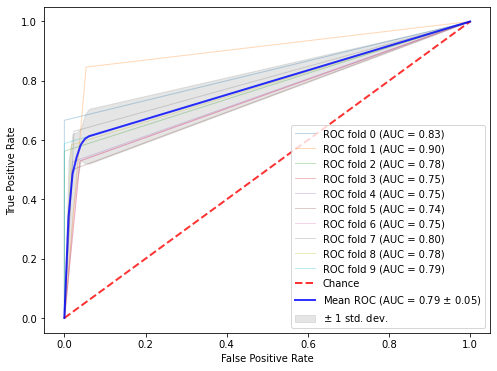

In [8]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .2, train_size = .8)
classifier = VotingClassifier(estimators=[('rf',clfrf),('svc',clfSVC),('gbdt',clfGBDT),('xgbt',clfXGBT)], voting='hard', weights= max_weights)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).predict(X[test])
    # y_score.shape==(75, 3)
    if len(y_score.shape)<= 1 :
        y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score[:, 0])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [9]:
y_score[:,0]

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0])

In [10]:
Y[test]

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1])